<a href="https://colab.research.google.com/github/CedricBone/Genesee-River/blob/main/Regression(0_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Genesee River Predictions** (GRP) 0.0
## https://dashboard.waterdata.usgs.gov/app/nwd/?region=lower48&aoi=default

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [ ]:
def AAAAA(list):
  row = 0
  for data in list:
    if(data == ''):
      data = -1
      list[row] = -1
    else:
      try:
        list[row] = int(data)
      except:
        list[row] = float(data)
    row+=1

In [ ]:
train_data_path = '/content/drive/MyDrive/Fall 2021/Engineering Intramurals /Rochester(11-21).txt'

dates = []           # Date
times = []           # Time (EST)
discharge = []       # Rate of Discharge (FT^3/s)
temperature = []     # Temperature (C)
PH = []              # PH 
dissolved_o2 = []    # Dissolved Oxygen (mg/L)
gauge_height = []    # Gauge Height (Ft)


with open(train_data_path, newline = '') as train_riverDataSets:
    riverDataSet_reader = csv.reader(train_riverDataSets, delimiter='\t')
    for train_riverDataSet in riverDataSet_reader:
      
      dates.append(train_riverDataSet[2][0:10])
      times.append(train_riverDataSet[2][11:])
      discharge.append((train_riverDataSet[4]))
      temperature.append((train_riverDataSet[6]))
      PH.append((train_riverDataSet[8]))
      dissolved_o2.append((train_riverDataSet[10]))
      gauge_height.append((train_riverDataSet[12]))

In [ ]:
year = []
month = []
day = []
hour = []
minute = []

for date in dates:
    year.append(int(date[0:4]))
    month.append(int(date[5:7]))
    day.append(int(date[8:]))
    
for time in times:
    hour.append(int(time[0:2]))
    minute.append(int(time[3:]))

In [ ]:
AAAAA(discharge)
AAAAA(temperature)
AAAAA(PH)
AAAAA(dissolved_o2)
AAAAA(gauge_height)
AAAAA(year)
AAAAA(month)
AAAAA(day)
AAAAA(hour)
AAAAA(minute)

In [ ]:
train_riverData = []
for number in range(len(dates)):
    tempList = []
    tempList.append(year[number])
    tempList.append(month[number])
    tempList.append(day[number])
    tempList.append(hour[number])
    tempList.append(minute[number])
    tempList.append(discharge[number])
    tempList.append(temperature[number])
    tempList.append(PH[number])
    tempList.append(dissolved_o2[number])
    train_riverData.append(tempList)

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_riverData))

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      #keras.Input(shape=(9)),
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
      ])
  model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_model = build_and_compile_model(normalizer)
#dnn_model.summary()

In [ ]:
%%time
history = dnn_model.fit(
    np.array(train_riverData),
    np.array(gauge_height),
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 24min 50s, sys: 2min 30s, total: 27min 20s
Wall time: 19min 56s


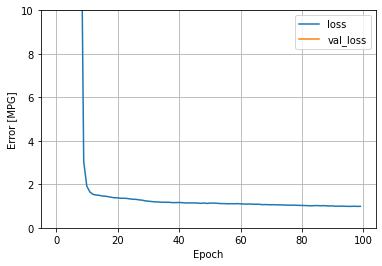

In [ ]:
plot_loss(history)

In [ ]:
!mkdir -p saved_model
dnn_model.save('/content/drive/MyDrive/Fall 2021/Engineering Intramurals')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Fall 2021/Engineering Intramurals/assets


In [ ]:
test_data_path = '/content/drive/MyDrive/Fall 2021/Engineering Intramurals /Rochester(21-21).txt'

dates = []           # Date
times = []           # Time (EST)
discharge = []       # Rate of Discharge (FT^3/s)
temperature = []     # Temperature (C)
PH = []              # PH 
dissolved_o2 = []    # Dissolved Oxygen (mg/L)
gauge_height = []    # Gauge Height (Ft)


with open(test_data_path, newline = '') as test_riverDataSets:
    riverDataSet_reader = csv.reader(test_riverDataSets, delimiter='\t')
    for test_riverDataSet in riverDataSet_reader:
      if (test_riverDataSet[0] == 'USGS'):
        dates.append(test_riverDataSet[2][0:10])
        times.append(test_riverDataSet[2][11:])
        discharge.append((test_riverDataSet[4]))
        temperature.append((test_riverDataSet[6]))
        PH.append((test_riverDataSet[8]))
        dissolved_o2.append((test_riverDataSet[10]))
        gauge_height.append((test_riverDataSet[12]))

In [ ]:
year = []
month = []
day = []
hour = []
minute = []

for date in dates:
    year.append(int(date[0:4]))
    month.append(int(date[5:7]))
    day.append(int(date[8:]))
    
for time in times:
    hour.append(int(time[0:2]))
    minute.append(int(time[3:]))

In [ ]:
AAAAA(discharge)
AAAAA(temperature)
AAAAA(PH)
AAAAA(dissolved_o2)
AAAAA(gauge_height)
AAAAA(year)
AAAAA(month)
AAAAA(day)
AAAAA(hour)
AAAAA(minute)

In [ ]:
test_riverData = []
for number in range(len(dates)):
    tempList = []
    tempList.append(year[number])
    tempList.append(month[number])
    tempList.append(day[number])
    tempList.append(hour[number])
    tempList.append(minute[number])
    tempList.append(discharge[number])
    tempList.append(temperature[number])
    tempList.append(PH[number])
    tempList.append(dissolved_o2[number])
    test_riverData.append(tempList)

In [ ]:
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(test_riverData, gauge_height, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
dnn_model,374.050781


In [ ]:
test_results['dnn_model']

374.05078125

In [ ]:
test_predictions = dnn_model.predict(test_riverData)
print(gauge_height)
print(test_predictions)

[12.67, 12.66, 12.66, 12.66, 12.66, 12.66, 12.66, 12.66, 12.66, 12.65, 12.66, 12.66, 12.67, 12.67, 12.67, 12.67, 12.67, 12.67, 12.67, 12.67, 12.66, 12.66, 12.65, 12.65, 12.65, 12.65, 12.65, 12.66, 12.66, 12.66, 12.66, 12.66, 12.66, 12.66, 12.66, 12.66, 12.66, 12.66, 12.66, 12.66, 12.65, 12.65, 12.66, 12.63, 12.63, 12.62, 12.65, 12.66, 12.66, 12.58, 12.62, 12.65, 12.68, 12.7, 12.7, 12.69, 12.68, 12.68, 12.7, 12.71, 12.7, 12.7, 12.7, 12.73, 12.74, 12.74, 12.73, 12.72, 12.72, 12.72, 12.73, 12.74, 12.74, 12.74, 12.73, 12.74, 12.74, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.74, 12.74, 12.74, 12.75, 12.76, 12.76, 12.76, 12.76, 12.76, 12.76, 12.7

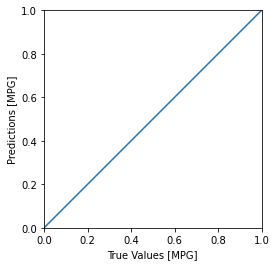

In [ ]:
test_predictions = dnn_model.predict(test_riverData).flatten()

a = plt.axes(aspect='equal')
plt.scatter(gauge_height, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

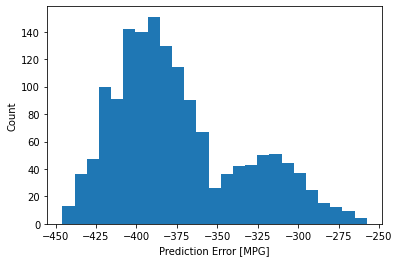

In [ ]:
error = test_predictions - gauge_height
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')
